# Logistic Regression project tutorial

## Paso 1: Carga del conjunto de datos

In [32]:
import logging # crea una bitacora de incidencias de nuestro script
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

logger = logging.getLogger()
logger.setLevel(logging.INFO) 

In [2]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
df_raw.sample(10, random_state=2025)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4479,58,retired,married,basic.4y,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,yes
24230,51,entrepreneur,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8307,43,admin.,married,high.school,no,yes,no,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
4824,31,admin.,married,high.school,no,no,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
12201,41,blue-collar,married,basic.6y,no,no,no,telephone,jul,wed,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.956,5228.1,no
20123,36,housemaid,married,basic.6y,no,no,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
11995,44,admin.,married,university.degree,unknown,yes,yes,telephone,jun,thu,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.955,5228.1,no
9514,45,admin.,married,university.degree,no,yes,no,telephone,jun,mon,...,5,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
20217,48,entrepreneur,married,university.degree,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
8739,22,services,single,high.school,no,no,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no


## Paso 2: Realiza un EDA completo

In [4]:
df_baking = df_raw.copy()
df_baking['job'] = df_baking['job'].astype('category')
df_baking['marital'] = df_baking['marital'].astype('category')
df_baking['education'] = df_baking['education'].astype('category')
df_baking['default'] = df_baking['default'].astype('category')
df_baking['housing'] = df_baking['housing'].astype('category')
df_baking['loan'] = df_baking['loan'].astype('category')
df_baking['contact'] = df_baking['contact'].astype('category')
df_baking['month'] = df_baking['month'].astype('category')
df_baking['day_of_week'] = df_baking['day_of_week'].astype('category')
df_baking['poutcome'] = df_baking['poutcome'].astype('category')
df_baking['y'] = df_baking['y'].astype('category')
df_baking = df_baking.drop(['emp.var.rate', 'nr.employed'], axis=1)# se eliminan porque tiene una correlacion mayor a |0.75|
df_baking.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

In [5]:
df = df_baking.copy()

In [6]:
display(df.describe(include='number').T)
display(df.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045


,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


En el describe se observa que algunas variables numericas tienen una desviacion estandar mas alta que la media, como la duration,
campaign, previous, emp.var.rate, y observamos que las variables categoricas las podemos escalar o pasar numericas porque no tienen muchos niveles

### Histograma de variables numericas

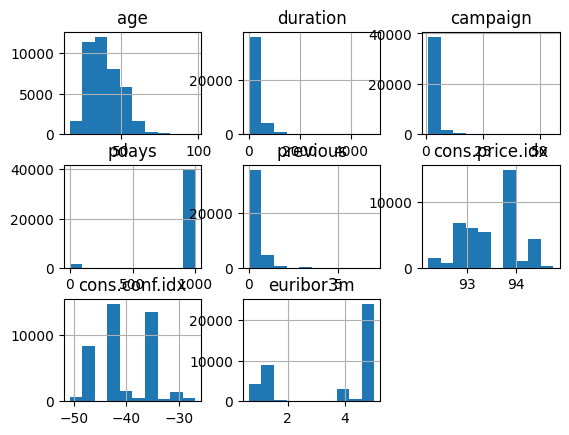

In [7]:
df.hist()
plt.show()

Se observa que algunas variables numericas tienen una distribucion discretas, la varible edad tiene una distribucion continua, con una media de cuarenta, concentrandose entre 30 y 50; la variable 'cons.conf.idx' que es un Índice de confianza del consumidor (Indicador mensual (numérico)), tiene numeros negativos. 

### Histograma de variables categoricas

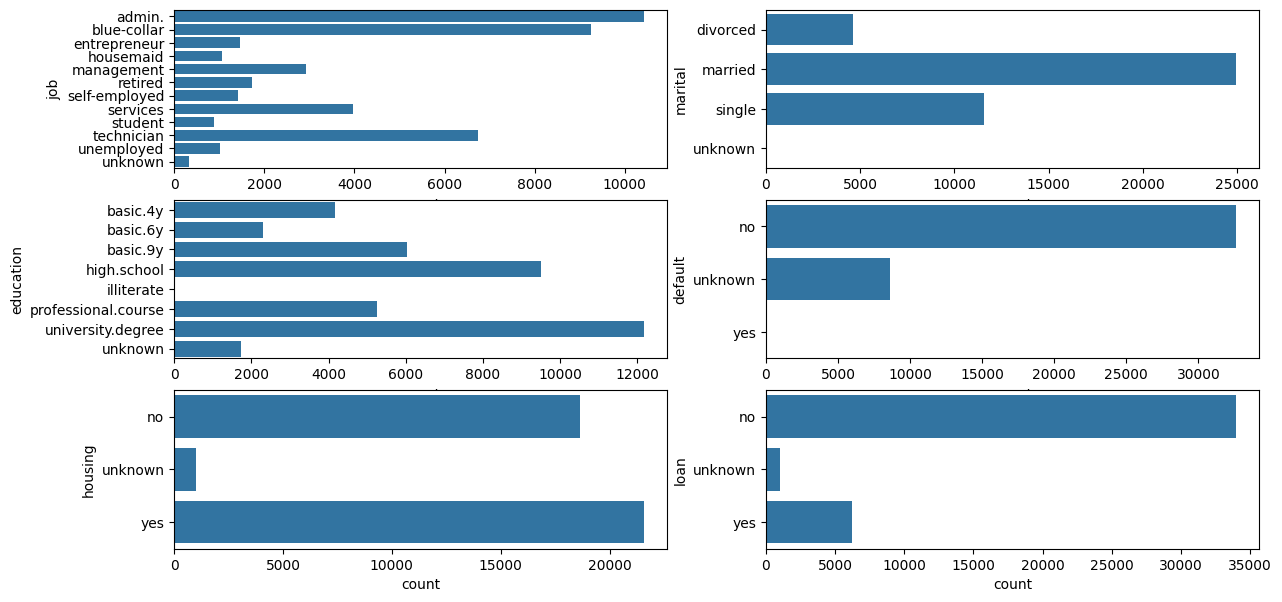

In [8]:
fig, ax = plt.subplots(3,2, figsize = (14, 7))
sns.countplot(data = df, y = 'job', ax = ax[0,0])
sns.countplot(data = df, y = 'marital', ax = ax[0,1])
sns.countplot(data = df, y = 'education', ax = ax[1,0])
sns.countplot(data = df, y = 'default', ax = ax[1,1])
sns.countplot(data = df, y = 'housing', ax = ax[2,0])
sns.countplot(data = df, y = 'loan', ax = ax[2,1])

plt.show()

Podemos observar como se distribuye las variables categoricas, en 'job' las tres mas populares son: admin, blue-collar, technician; en 'education' el top tres es: university.degree, high.school seguido por professional.course; en la variable 'marital': married es la que tiene mas registros seguido por single.

In [ ]:
sns.pairplot(data = df, hue= 'y') # cruza dos variables, la dependiente con cada numerica
plt.show()

Cruzando las variables numericas con la variable 'y', se puede observar en la diagonal de los graficos que la poblacion azul, es decir, el 'no' es mas notable que el 'si'

### Matriz de correlacion

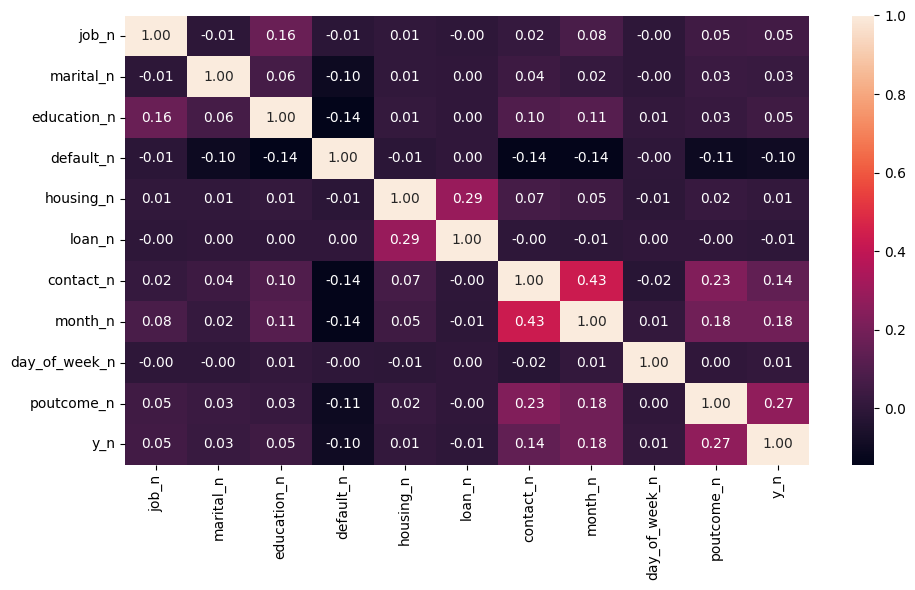

In [10]:
df["job_n"] = pd.factorize(df["job"])[0]
df["marital_n"] = pd.factorize(df["marital"])[0]
df["education_n"] = pd.factorize(df["education"])[0]
df["default_n"] = pd.factorize(df["default"])[0]
df["housing_n"] = pd.factorize(df["housing"])[0]
df["loan_n"] = pd.factorize(df["loan"])[0]
df["contact_n"] = pd.factorize(df["contact"])[0]
df["month_n"] = pd.factorize(df["month"])[0]
df["day_of_week_n"] = pd.factorize(df["day_of_week"])[0]
df["poutcome_n"] = pd.factorize(df["poutcome"])[0]
df["y_n"] = pd.factorize(df["y"])[0]
#arreglar las columnas numericas

cat = ['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n',
       'month_n', 'day_of_week_n', 'poutcome_n', 'y_n']

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[cat].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

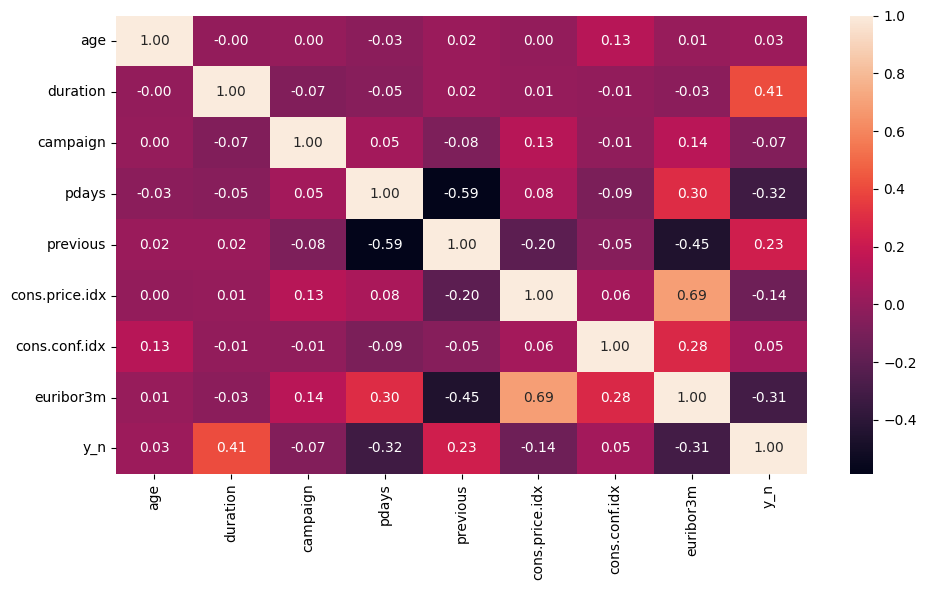

In [11]:
num = ['age',  'duration', 'campaign', 'pdays',
       'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m','y_n']

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[num].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

### Min-Max Scaling - dividir el conjunto en train y test

In [12]:
# dividir en train y test
variables = ['age',  'duration', 'campaign', 'pdays',
       'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m',
       'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n',
       'month_n', 'day_of_week_n', 'poutcome_n']
X = df.drop("y_n", axis = 1)[variables]
y = df["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2025)

X_train.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
3460,46,430,2,999,0,93.994,-36.4,4.860,2,0,6,0,0,0,0,0,3,0
1935,36,31,3,999,0,93.994,-36.4,4.855,2,0,1,0,1,0,0,0,4,0
26485,33,49,3,999,0,93.200,-42.0,4.076,2,0,6,0,1,1,1,5,3,0
12820,33,272,1,999,0,93.918,-42.7,4.962,1,0,1,0,0,0,1,2,1,0
17169,57,102,4,999,0,93.918,-42.7,4.962,5,1,0,0,0,0,0,2,4,0


In [13]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = variables)

X_train_scal.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
3460,0.358025,0.087434,0.018182,1.0,0.0,0.698753,0.602510,0.958059,0.181818,0.000000,0.857143,0.0,0.0,0.0,0.0,0.000000,0.75,0.0
1935,0.234568,0.006303,0.036364,1.0,0.0,0.698753,0.602510,0.956926,0.181818,0.000000,0.142857,0.0,0.5,0.0,0.0,0.000000,1.00,0.0
26485,0.197531,0.009963,0.036364,1.0,0.0,0.389322,0.368201,0.780322,0.181818,0.000000,0.857143,0.0,0.5,0.5,1.0,0.555556,0.75,0.0
12820,0.197531,0.055307,0.000000,1.0,0.0,0.669135,0.338912,0.981183,0.090909,0.000000,0.142857,0.0,0.0,0.0,1.0,0.222222,0.25,0.0
17169,0.493827,0.020740,0.054545,1.0,0.0,0.669135,0.338912,0.981183,0.454545,0.333333,0.000000,0.0,0.0,0.0,0.0,0.222222,1.00,0.0


## Paso 3: Construye un modelo de regresión logística

#### Feature selection

In [14]:
selection_model = SelectKBest(chi2, k = 6)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,duration,previous,euribor3m,contact_n,month_n,poutcome_n
0,430.0,0.0,4.860,0.0,0.0,0.0
1,31.0,0.0,4.855,0.0,0.0,0.0
2,49.0,0.0,4.076,1.0,5.0,0.0
3,272.0,0.0,4.962,1.0,2.0,0.0
4,102.0,0.0,4.962,0.0,2.0,0.0


In [15]:
X_test_sel.head()

,duration,previous,euribor3m,contact_n,month_n,poutcome_n
0,1045.0,0.0,4.856,0.0,0.0,0.0
1,89.0,0.0,4.191,1.0,5.0,0.0
2,282.0,0.0,4.864,0.0,1.0,0.0
3,189.0,0.0,4.858,0.0,0.0,0.0
4,144.0,0.0,4.956,0.0,2.0,0.0


In [16]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [17]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,duration,previous,euribor3m,contact_n,month_n,poutcome_n,y_n
0,430.0,0.0,4.860,0.0,0.0,0.0,0
1,31.0,0.0,4.855,0.0,0.0,0.0,0
2,49.0,0.0,4.076,1.0,5.0,0.0,0
3,272.0,0.0,4.962,1.0,2.0,0.0,0
4,102.0,0.0,4.962,0.0,2.0,0.0,0


In [24]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [19]:
model = LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [21]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(8238,))

In [22]:
accuracy_score(y_test, y_pred)

0.9045884923525127

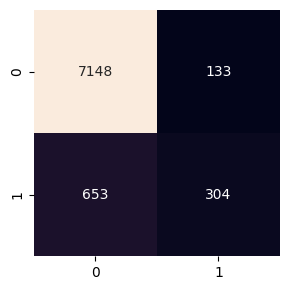

In [26]:
cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

La interpretación de una matriz de confusión es la siguiente:

- Verdaderos positivos (TP, True positive): Se corresponde con el número 7148 y son los casos en los que el modelo predijo positivo y la clase real también es positiva.
- Verdaderos negativos (TN, False negative): Se corresponde con el número 304 y son los casos en los que el modelo predijo negativo y la clase real también es negativa.
- Falsos positivos (FP, False positive): Se corresponde con el número 653 y son los casos en los que el modelo predijo positivo y la clase real es negativa.
- Falsos negativos (FN, False negative): Se corresponde con el número 133 y son los casos en los que el modelo predijo negativo y la clase real es positiva.


## Paso 4: Optimiza el modelo anterior

In [28]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [29]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.001, 'penalty': None, 'solver': 'lbfgs'}


In [31]:
model_grid = LogisticRegression( C = 0.001, solver = "lbfgs")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8990046127700898

Observamos que el accuracy baja 1%, por ahora es mejor el modelo que entrenamos, vamos a probar con el modo aleatorio.

In [33]:
# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 2025)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=2025, scoring='accuracy')

In [34]:
random_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

Mejores hiperparámetros: {'solver': 'lbfgs', 'penalty': None, 'C': np.float64(0.004832930238571752)}


In [35]:
model_random_search = LogisticRegression(C = 0.004832930238571752, solver = "lbfgs")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.9027676620538966

Se observa con los hiperparametros aleatorios que el accuracy sin optimizar es un poco mas alto que optimizando con los hiperparametros aleatorios. 